<a href="https://colab.research.google.com/github/Heisbana/Medical-image-analysis/blob/main/chest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
 #to read image
from skimage.io import imread
#to resize image to uniform sizes
from skimage.transform import resize

import tensorflow as tf
import numpy as np
import pandas as pd

import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator #, load_img, img_to_array #
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
tf.keras.applications.inception_v3.preprocess_input
from keras.applications.inception_v3 import preprocess_input

In [ ]:
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(256,256,3),
                                                           include_top=False
                                                           )

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False


In [ ]:
#read on activation functions
X = Flatten()(base_model.output)
X =Dense(units=2, activation = 'sigmoid')(X)

In [ ]:
model = Model(base_model.input, X)

#compile model
model.compile(optimizer='adam',loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [ ]:
chest_dataset = '/content/drive/MyDrive/Dataset/Copy of chest_xray/train'

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center = True, rotation_range=0.4,
                                  width_shift_range=0.3,
                                  horizontal_flip=True,
                                  preprocessing_function= preprocess_input,
                                  zoom_range=0.4,
                                  shear_range = 0.4)

train_data = train_datagen.flow_from_directory(directory=chest_dataset,
                                              target_size=(256,256),
                                              batch_size=32)

In [ ]:
train_data.class_indices

In [ ]:
t_img , label = train_data.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
    '''
    input: image array
    output: plot images
    '''
    for idx , img in enumerate(img_arr):
        if idx <= 3:
            plt.figure(figsize(5,5))
            plt.imshow()

In [ ]:
data_path = '/content/drive/MyDrive/chest_model.h5'

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath=data_path,
                  monitor = 'accuracy',
                  verbose=1,
                  save_best_only=True)
es= EarlyStopping(monitor='accuracy',
                 min_delta=0.01,
                 patience=20,
                 verbose=1)

cb=[mc,es]

In [ ]:
his = model.fit_generator(train_data,
                         steps_per_epoch=10,
                         epochs=30,
                         callbacks=cb)

<ipython-input-21-499bcc686379>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 4.4874 - accuracy: 0.6844 
Epoch 1: accuracy improved from -inf to 0.68437, saving model to /content/drive/MyDrive/chest_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 226s 19s/step - loss: 4.4874 - accuracy: 0.6844
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.4504 - accuracy: 0.7937 
Epoch 2: accuracy improved from 0.68437 to 0.79375, saving model to /content/drive/MyDrive/chest_model.h5
10/10 [==============================] - 187s 19s/step - loss: 1.4504 - accuracy: 0.7937
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.9822 - accuracy: 0.8219 
Epoch 3: accuracy improved from 0.79375 to 0.82187, saving model to /content/drive/MyDrive/chest_model.h5
10/10 [==============================] - 170s 17s/step - loss: 0.9822 - accuracy: 0.8219
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.8070 - accuracy: 0.8844 
Epoch 4: accuracy improved from 0.82187 to 0.88437, saving model to /content/drive/MyDrive/chest_model.h5
10/10 [==============================] - 158s 16s/step - loss: 0.8070 - accuracy: 0.8844
Epoch 5/30
10/10 [=======================

In [ ]:
from keras.models import load_model

In [ ]:
chest_load = '/content/drive/MyDrive/chest_best.h5'

In [ ]:
model = load_model(chest_load)

NameError: ignored

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
test_data = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/Dataset/Copy of chest_xray/test',
                                              target_size=(256,256),
                                              batch_size=32)

Found 624 images belonging to 2 classes.


In [ ]:
model.predict(test_data)

20/20 [==============================] - 148s 7s/step


array([[9.5552480e-01, 3.9915963e-06],
       [9.9911219e-01, 1.8439930e-03],
       [9.9764323e-01, 2.4008508e-04],
       ...,
       [1.0099304e-03, 9.3410325e-01],
       [1.5049693e-04, 9.9709380e-01],
       [6.4410327e-05, 9.9898607e-01]], dtype=float32)

20/20 [==============================] - 112s 5s/step


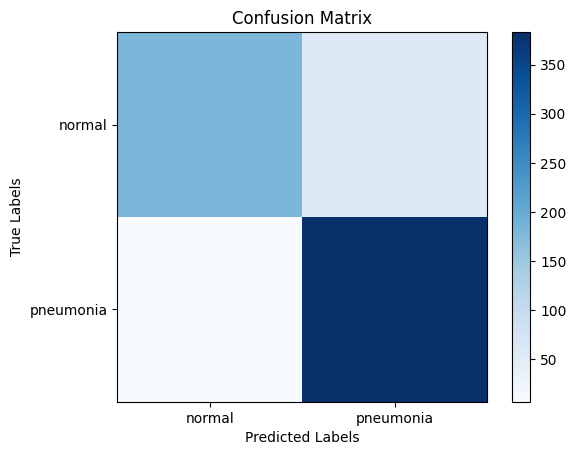

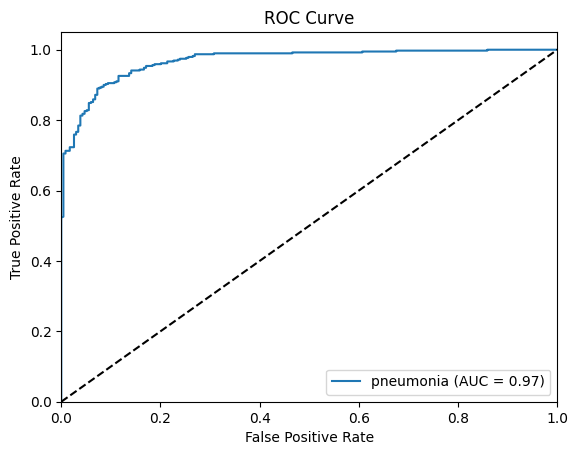

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Predict probabilities for test data
y_pred_prob = model.predict(test_data)

# Get predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = test_data.classes

# Map class labels to binary labels
class_mapping = {0: 'normal', 1: 'pneumonia'}
y_true_binary = np.array([class_mapping[label] for label in y_true])
y_pred_binary = np.array([class_mapping[label] for label in y_pred])

# Generate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['normal', 'pneumonia'])
plt.yticks(tick_marks, ['normal', 'pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_binary, y_pred_prob[:, 1], pos_label='pneumonia')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='pneumonia (AUC = {0:.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
cm

array([[179,  55],
       [  7, 383]])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get true labels and predicted labels
y_true = test_data.classes
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate precision
precision = tp / (tp + fp)

# Calculate F1 score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

print('Sensitivity (Recall):', sensitivity)
print('Precision:', precision)
print('F1 Score:', f1_score)
print('Accuracy:', accuracy)


Sensitivity (Recall): 0.982051282051282
Precision: 0.8744292237442922
F1 Score: 0.9251207729468598
Accuracy: 0.9006410256410257


In [ ]:
from keras.models import load_model

In [ ]:
chest_load = '/content/drive/MyDrive/chest_best.h5'

In [ ]:
model = load_model(chest_load)

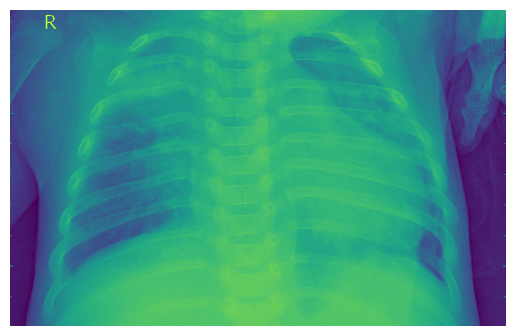

196608
1/1 [==============================] - 10s 10s/step
PNEUMONIA


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pls = '/content/drive/MyDrive/Dataset/Copy of chest_xray/test/PNEUMONIA/BACTERIA-1220485-0001.jpeg'
img = mpimg.imread(pls)
plt.imshow(img)
plt.axis('off')
plt.show()
# Load and preprocess the new image
img = image.load_img(pls, target_size=(256, 256),color_mode='rgb')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize pixel values (if required)

predictions = model.predict(img)
class_labels = ['NORMAL','PNEUMONIA']  # Replace with your class labels
predicted_class = class_labels[np.argmax(predictions)]
confidence = predictions[0][np.argmax(predictions)]  # Probability of the predicted class
print(predicted_class)